In [1]:
from MAF_All_in_One import maf_dsf
import torch

In [2]:
model = maf_dsf.MAF(p=2, flowtype = 'ddsf')

float32
float32
float32
float32
float32


In [3]:
# import torch.nn as nn
# nn.Parameter(torch.Tensor(2,3))

In [4]:
# nn.Conv1d(5, 2, 1.0)

In [5]:
teste = torch.rand(size = (1,2))
model.density(teste)

(tensor([[0.2503, 0.6862]], grad_fn=<AddBackward0>),
 tensor([2.9340], grad_fn=<SubBackward0>))

In [12]:
X = torch.linspace(0, 2*torch.pi, 100)
Y = torch.sin(X)
XY = torch.stack([X,Y], dim = 1)
XY.shape

torch.Size([100, 2])

In [14]:
# XY.device

In [22]:
# model = MAF(p=2)
# model = maf_dsf.MAF(p=2)
model = maf_dsf.MAF(p=2, flowtype = 'ddsf')
flow = model.flow
optimizer = torch.optim.Adam(flow.parameters(), lr = 1e-3, weight_decay = 1e-4)
losses = []
for epoch in range(600):

    optimizer.zero_grad()

    z, loss = model.density(XY)

    loss = loss.mean()

    if not (torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f'Epoch: {epoch + 1}, Loss: {loss}')
        losses.append(loss.item())


float32
float32
float32
float32
float32
Epoch: 100, Loss: 2.4405205249786377
Epoch: 200, Loss: 0.9596665501594543
Epoch: 300, Loss: -0.1238655373454094
Epoch: 400, Loss: 2.192620038986206
Epoch: 500, Loss: -0.20889820158481598
Epoch: 600, Loss: -0.3238571882247925


In [20]:
# z

In [9]:
import matplotlib.pyplot as plt

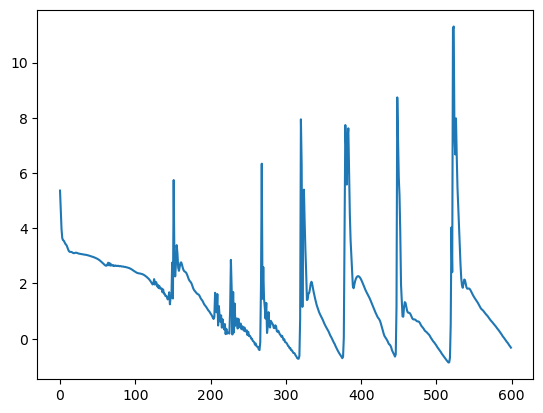

In [23]:
plt.plot(losses)

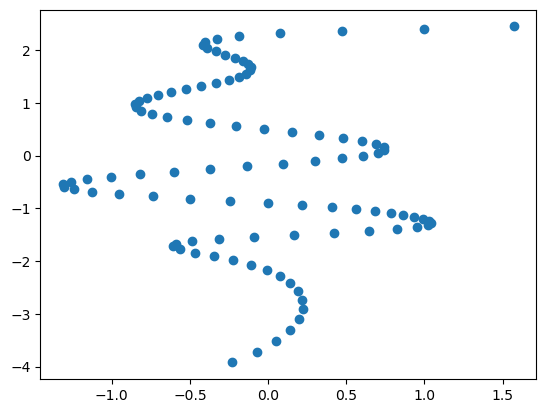

In [24]:
plt.scatter(z[:,0].detach().cpu().numpy(), z[:,1].detach().cpu().numpy())